# Project: Credit Card Customer Segmentation

## Introduction

In this guided project, we’ll play the role of a data scientist working for a credit card company.
The dataset contains information about the company’s clients and we're asked to help segment them into different groups in order to apply different business strategies for each type of customer.

For instance, the company could provide higher credit limits for customers that use the card a lot, but spend little money, or even create incentives for those with high income who don't use the card as much as the company expects. In order to apply different strategies, the company needs different groups of customers.

Luckily, the data engineering team has already cleaned most of the data so we can focus on building the best possible model to segment the data. Also, in a planning meeting with the Data Science coordinator, it was decided that we should use the K-means algorithm to segment the data.

The company expects to receive a group for each client and an explanation of the characteristics of each group and the main points that make them different.

In order to use the algorithm properly and achieve all the goals that the company has set for us, we'll go through the following steps:

- Analyze the dataset;
- Prepare the data for modeling;
- Find an appropriate number of clusters;
- Segment the data;
- Interpret and explain the results.

Here's the data dictionary:

customer_id: unique identifier for each customer.
- **age**: customer age in years.
- **gender**: customer gender (M or F).
**dependent_count**: number of dependents of each customer.
- **education_level**: level of education ("High School", "Graduate", etc.).
- **marital_status**: marital status ("Single", "Married", etc.).
- **estimated_income**: the estimated income for the customer projected by the data science team.
- **months_on_book**: time as a customer in months.
- **total_relationship_count**: number of times the customer contacted the company.
- **months_inactive_12_mon**: number of months the customer did not use the credit card in the last 12 months.
- **credit_limit**: customer's credit limit.
- **total_trans_amount**: the overall amount of money spent on the card by the customer.
- **total_trans_count**: the overall number of times the customer used the card.
- **avg_utilization_ratio**: daily average utilization ratio.

In [186]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [187]:
df = pd.read_csv("customer_segmentation.csv")

In [188]:
print("The shape has", df.shape[0],'rows')
print("The shape has", df.shape[1],'columns')

The shape has 10127 rows
The shape has 14 columns


In [189]:
df.dtypes

customer_id                   int64
age                           int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
estimated_income              int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
credit_limit                float64
total_trans_amount            int64
total_trans_count             int64
avg_utilization_ratio       float64
dtype: object

In [190]:
df.isnull().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

In [191]:
correlations = abs(df.corr())
correlations

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
customer_id,1.000000,0.007613,0.006772,0.015787,0.134588,0.006907,0.005729,0.005708,0.019692,0.002961,0.000266
age,0.007613,1.000000,0.122254,0.032922,0.788912,0.010931,0.054361,0.002476,0.046446,0.067097,0.007114
dependent_count,0.006772,0.122254,1.000000,0.051620,0.103062,0.039076,0.010768,0.068065,0.025046,0.049912,0.037135
estimated_income,0.015787,0.032922,0.051620,1.000000,0.027628,0.007181,0.002703,0.515863,0.015861,0.039988,0.277532
months_on_book,0.134588,0.788912,0.103062,0.027628,1.000000,0.009203,0.074164,0.007507,0.038591,0.049819,0.007541
total_relationship_count,0.006907,0.010931,0.039076,0.007181,0.009203,1.000000,0.003675,0.071386,0.347229,0.241891,0.067663
months_inactive_12_mon,0.005729,0.054361,0.010768,0.002703,0.074164,0.003675,1.000000,0.020394,0.036982,0.042787,0.007503
credit_limit,0.005708,0.002476,0.068065,0.515863,0.007507,0.071386,0.020394,1.000000,0.171730,0.075927,0.482965
total_trans_amount,0.019692,0.046446,0.025046,0.015861,0.038591,0.347229,0.036982,0.171730,1.000000,0.807192,0.083034
total_trans_count,0.002961,0.067097,0.049912,0.039988,0.049819,0.241891,0.042787,0.075927,0.807192,1.000000,0.002838


**Correlations** :
- Huge correlation between total_transaction_count (the overall number of times the customer used the card.) & total_transaction_count (the overall amount of money spent on the card by the customer.)
- Correlation between age and months_on_book (time as a customer in months)
- Correlation between estimated_income (the estimated income for the customer projected by the data science team) & credit_limit
- Correlation between credit_limit & avg_utilization_ratio (daily average utilization ratio.)

In [192]:
df.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


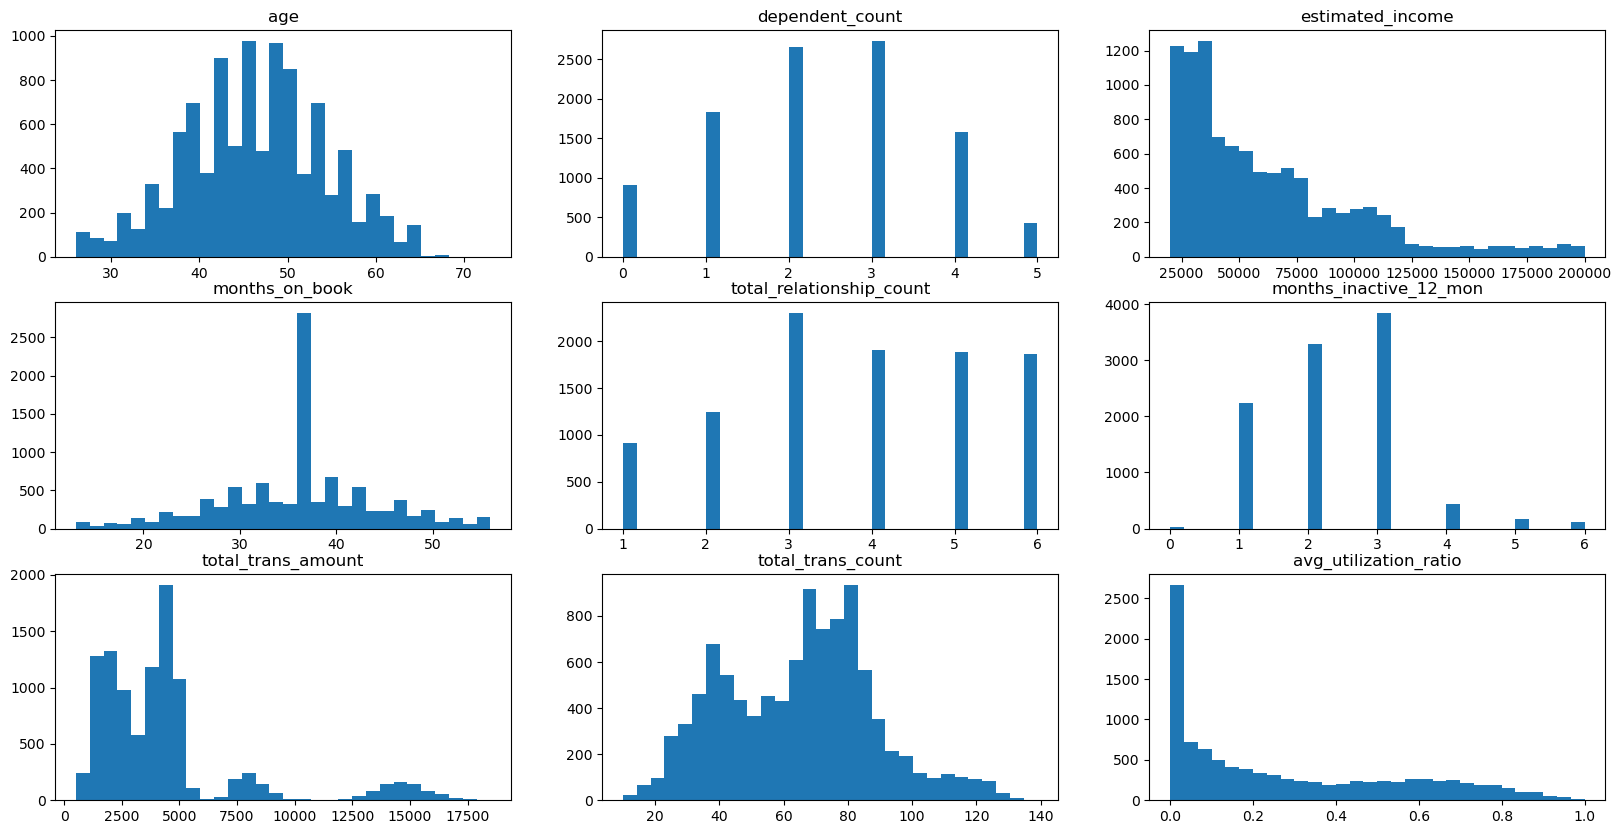

In [193]:
import matplotlib.pyplot as plt
numeric_variables = ['age', 'dependent_count', 'estimated_income', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio']

fig = plt.figure(figsize=(20, 10))

for i, variable in enumerate(numeric_variables) :
    ax = fig.add_subplot(3,3,i+1)
    ax.hist(df[variable], bins=30)  # customize number of bins as needed
    ax.set_title(variable)
plt.show()   


## Feature Engineering

Let's start dealing with the categorical columns. There are three of them: gender, education level, and marital status.
First, let's check on the gender and education_level columns.

The **gender** column contains only 2 unique values, "M" and "F", which means it's possible to replace all the rows with 1 and 0.

The **education_level** column contains 6 unique values. This column represents levels of education, and it's possible to rank the levels from the lowest to the highest, so it's possible to replace each unique level with a number, assuming we respect the order.

But before we do the modifications, **it's important to create a copy of the original DataFrame**. We'll make all the modifications in the copy and leave the original DataFrame untouched so we can use it to analyze the results later.

In [194]:
customers_modif = df.copy()

In [195]:
customers_modif["gender"] = customers_modif["gender"].apply(lambda x:1 if x=='M' else 0)
customers_modif['gender'].value_counts()

0    5358
1    4769
Name: gender, dtype: int64

In [196]:
replace_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
}
customers_modif['education_level'] = customers_modif['education_level'].replace(replace_mapping)

In [197]:
customers_modif['education_level'].value_counts()

3    3685
1    2351
0    1755
2    1192
4     616
5     528
Name: education_level, dtype: int64

## Feature Engineering - Part 2

Now, let's deal with the marital_status columns. This column contains these unique values:

- Single
- Married
- Divorced
- Unknown

Unfortunately, we can't do the same for this marital_status column as for the last categorical column. As we can see, unlike the education_level column, there is no level of magnitude between "Single", "Married" or "Divorced", for example. We can't say that any of them is higher or better than the others, which means we can't rank these categories objectively.

Therefore, we'll use one-hot-encoding to create dummy variables from this column.

In [198]:
df_dummies = pd.get_dummies(df['marital_status'])
customers_modif = pd.concat([customers_modif, df_dummies], axis=1)
customers_modif = customers_modif.drop(columns = 'marital_status')







## Scaling the Data

Note that we have different scaled data across the DataFrame. The estimated_income, for instance, contains numbers in the range of dozens and hundreds of thousands, while the dependent_count column contains numbers from 1 to 5.

At this point of the project we need to transform the data so it's all on the same scale.

In [199]:
new_df = customers_modif.copy()
new_df = new_df.drop(columns='customer_id')

In [200]:
scaler = StandardScaler()
scaler.fit(new_df)
scaled_df = scaler.transform(new_df)
scaled_df = pd.DataFrame(scaled_df, columns=new_df.columns)
scaled_df

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,Divorced,Married,Single,Unknown
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,-0.282405,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.282405,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.282405,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,1.059956,-0.266547,0.662787,-0.281380,0.509840,-0.522785,-0.337598,-0.509330,3.259358,2.221481,0.678714,-0.282405,-0.928214,1.252337,-0.282609
10123,-0.664382,1.059956,-0.266547,0.662787,-0.560775,-1.368442,0.120579,-0.337598,-0.479181,1.283475,0.176440,0.856458,3.541013,-0.928214,-0.798507,-0.282609
10124,-0.290150,-0.943436,-1.036462,-0.752211,-0.738571,0.008965,0.763943,0.651940,-0.354626,1.732994,-0.207005,-0.997155,-0.282405,1.077338,-0.798507,-0.282609
10125,-2.036565,1.059956,-0.266547,0.662787,-0.382978,0.008965,0.120579,0.651940,-0.368710,1.174848,-0.121795,-0.997155,-0.282405,-0.928214,-0.798507,3.538459


## Choosing K

Now our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia from each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization.

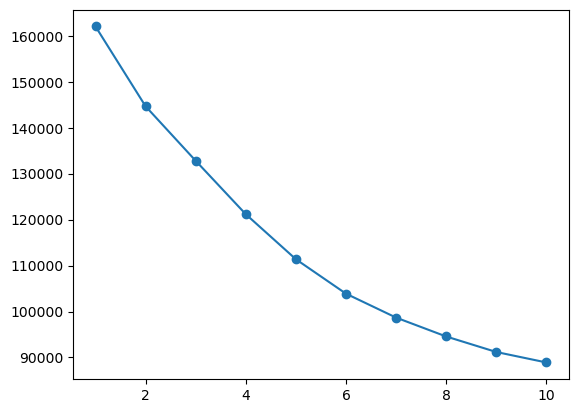

In [201]:
inertias = []
for k in range(1,11):
    model = KMeans(n_clusters = k)
    clusters = model.fit_predict(scaled_df)
    inertias.append(model.inertia_)
    
plt.plot(range(1,11), inertias, marker='o')
plt.show()
    

According to the Elbow curbe, I'll use K=6 or 7

In [202]:
model = KMeans(n_clusters = 6)
clusters = model.fit_predict(scaled_df)
scaled_df['CLUSTER'] = clusters +1
scaled_df['CLUSTER'].value_counts()

4    2809
3    2779
5    1630
1    1414
2     748
6     747
Name: CLUSTER, dtype: int64

In [203]:
df['CLUSTER'] = clusters + 1

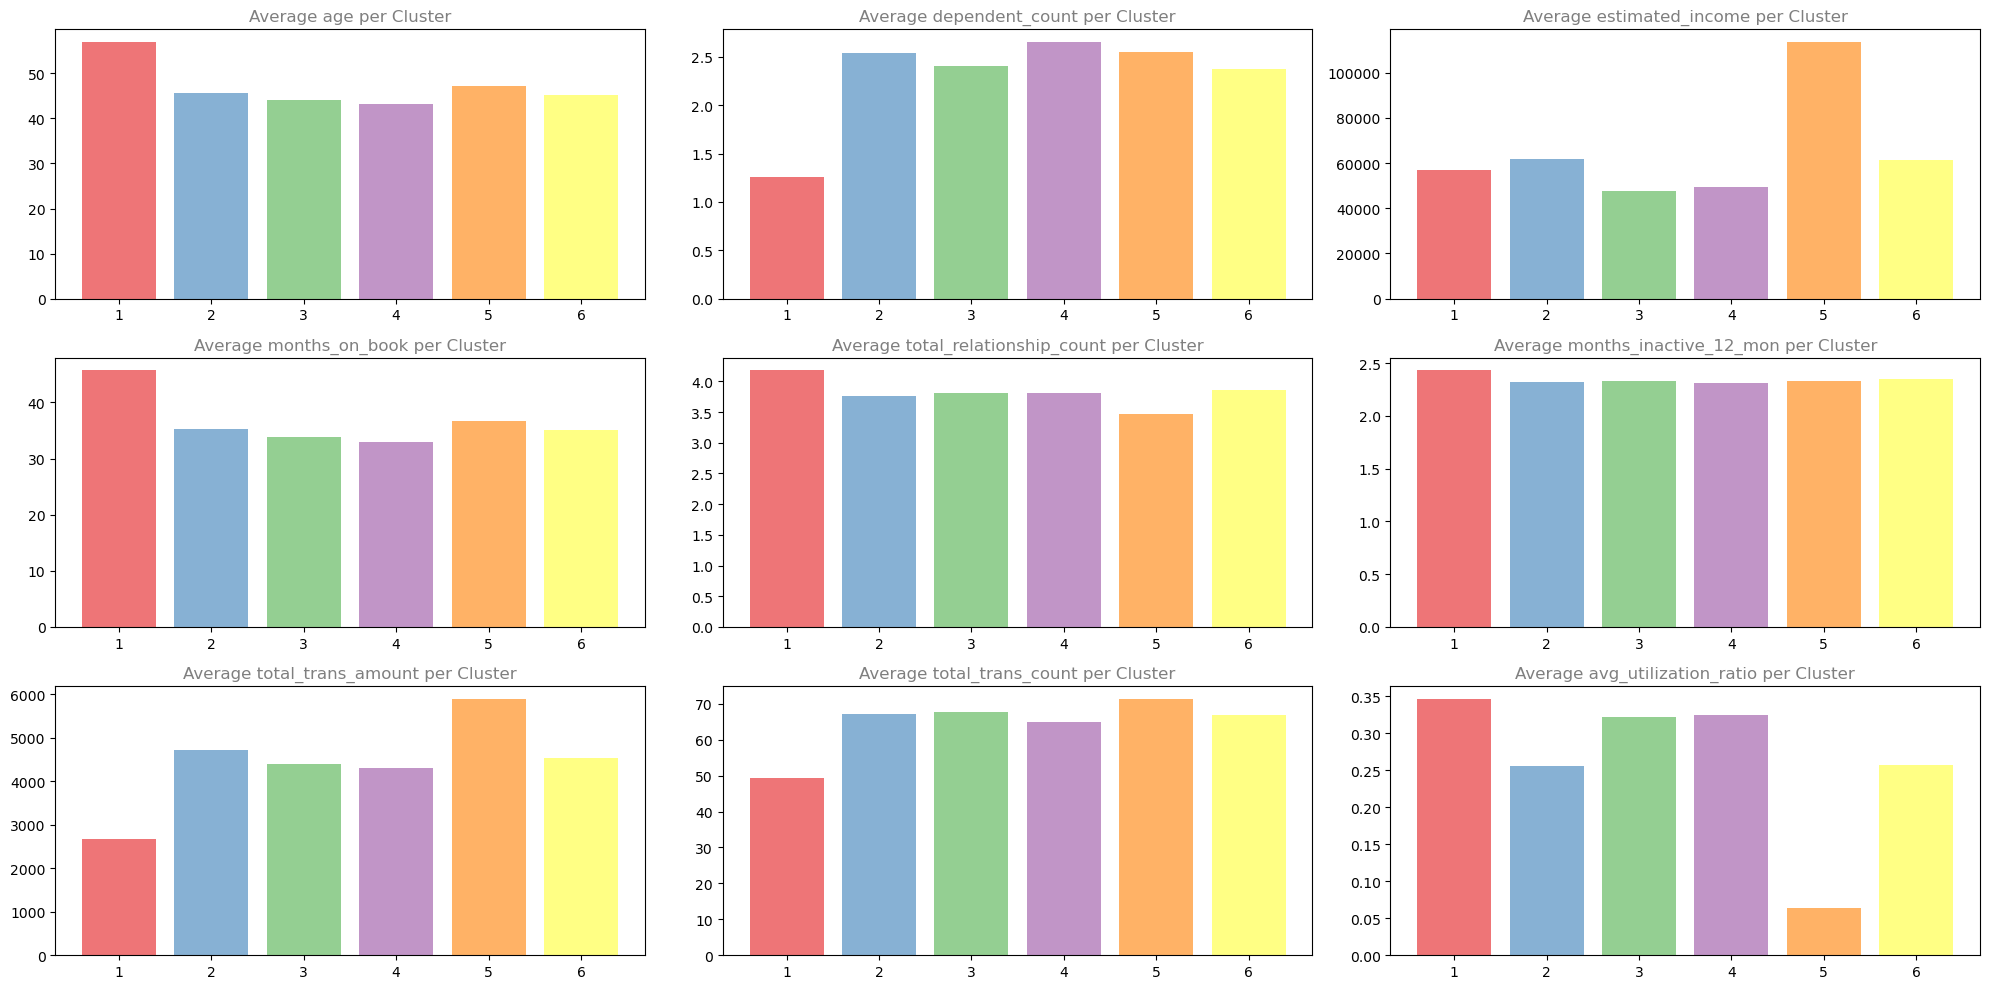

In [204]:
import seaborn as sns
fig = plt.figure(figsize=(20, 10))

for i, feature in enumerate(numeric_variables) :
    df_plot = df.groupby("CLUSTER")[feature].mean()
    ax = fig.add_subplot(3,3,i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {feature} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)

plt.tight_layout()
plt.show()
    

- Cluster 1 : higher average in estimated_income
- Cluster 2 : higher average avg_utiliation_ratio
- Cluster 3 : higher average total transaction amount & total_trans_count

<AxesSubplot:>

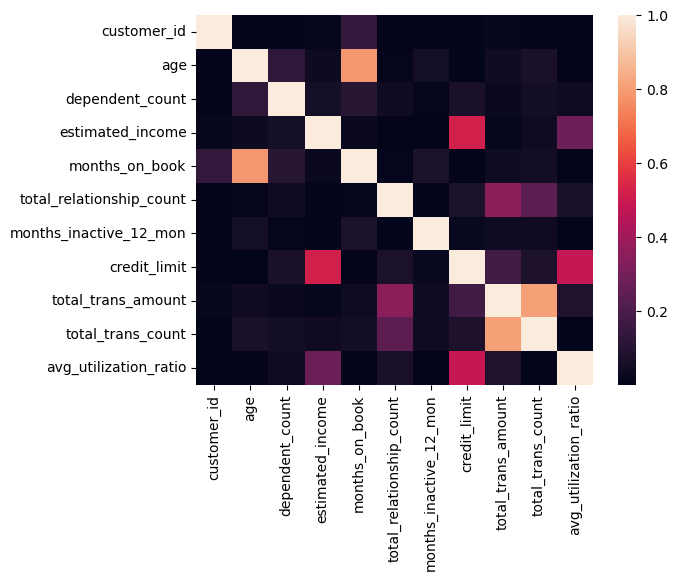

In [205]:
sns.heatmap(correlations)

<AxesSubplot:xlabel='total_trans_amount', ylabel='total_trans_count'>

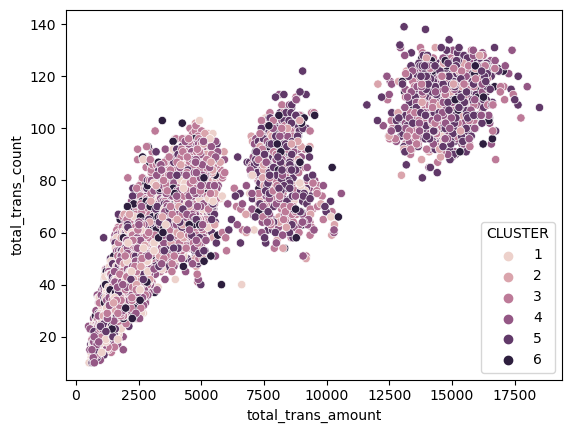

In [215]:
sns.scatterplot(data = df, x = 'total_trans_amount' ,y = 'total_trans_count', hue = 'CLUSTER')


<AxesSubplot:xlabel='estimated_income', ylabel='credit_limit'>

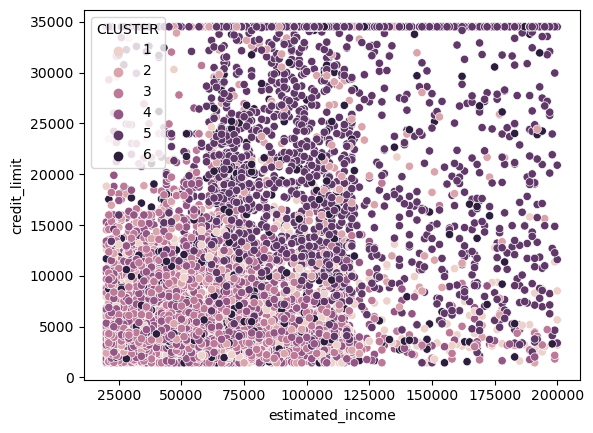

In [216]:
sns.scatterplot(data = df, x = 'estimated_income' ,y = 'credit_limit', hue = 'CLUSTER')





<AxesSubplot:xlabel='months_on_book', ylabel='age'>

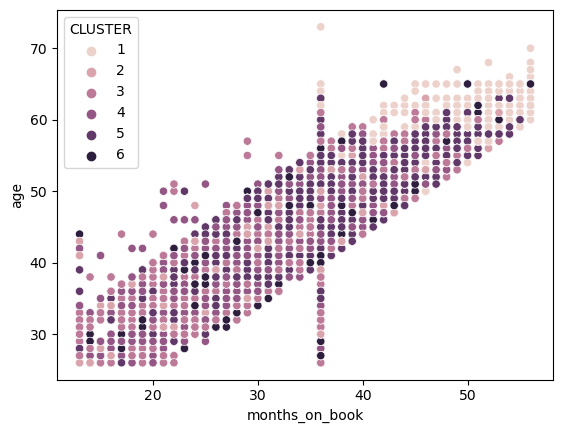

In [218]:
sns.scatterplot(data = df, x = 'months_on_book' ,y = 'age', hue = 'CLUSTER')





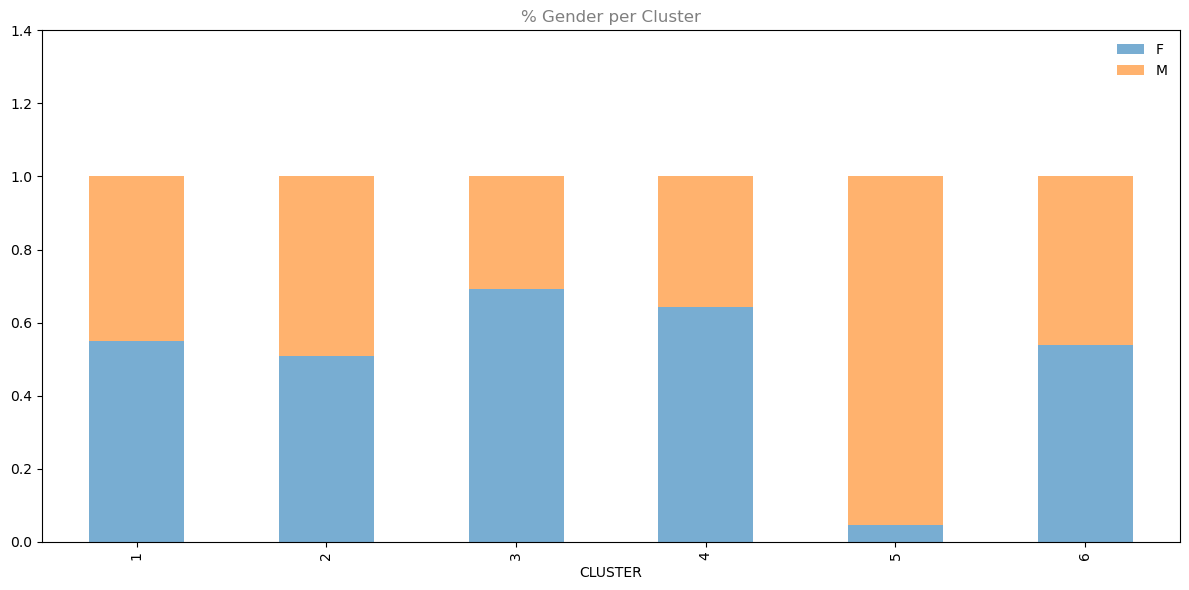

In [208]:
plot_df = pd.crosstab(
  index=df['CLUSTER'], columns=df['gender'],
  values=df['gender'], aggfunc='size', normalize='index'
)

fig, ax = plt.subplots(figsize=(12,6))
plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
ax.set_title(f'% Gender per Cluster', alpha=0.5)

ax.set_ylim(0, 1.4)
ax.legend(frameon=False)
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

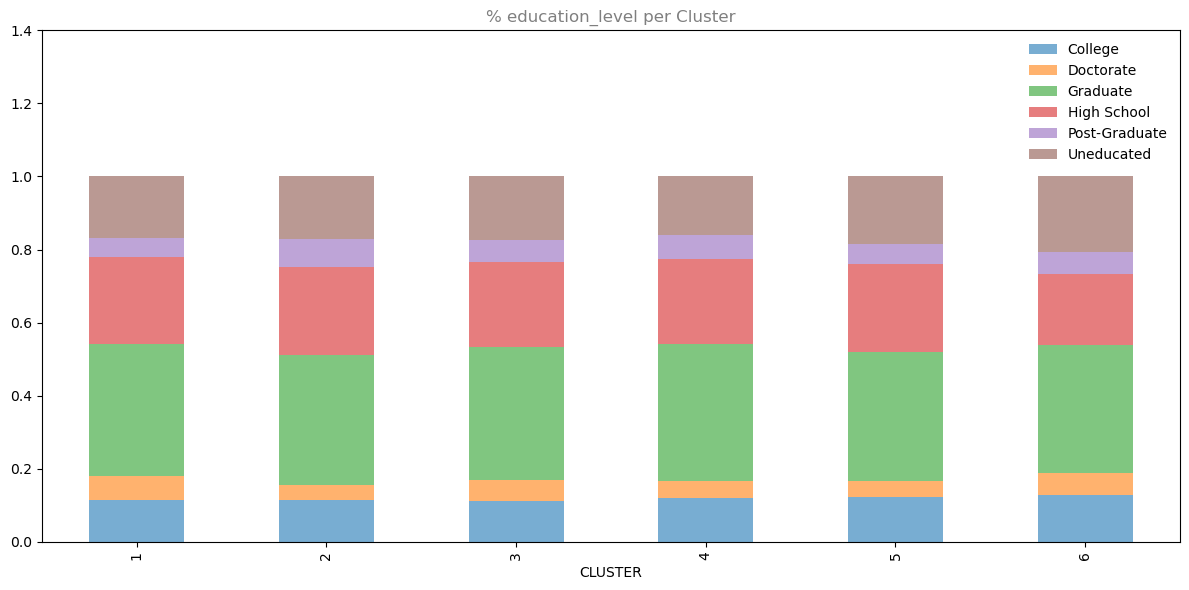

In [209]:
plot_df = pd.crosstab(
  index=df['CLUSTER'], columns=df['education_level'],
  values=df['education_level'], aggfunc='size', normalize='index'
)

fig, ax = plt.subplots(figsize=(12,6))
plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
ax.set_title(f'% education_level per Cluster', alpha=0.5)

ax.set_ylim(0, 1.4)
ax.legend(frameon=False)
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

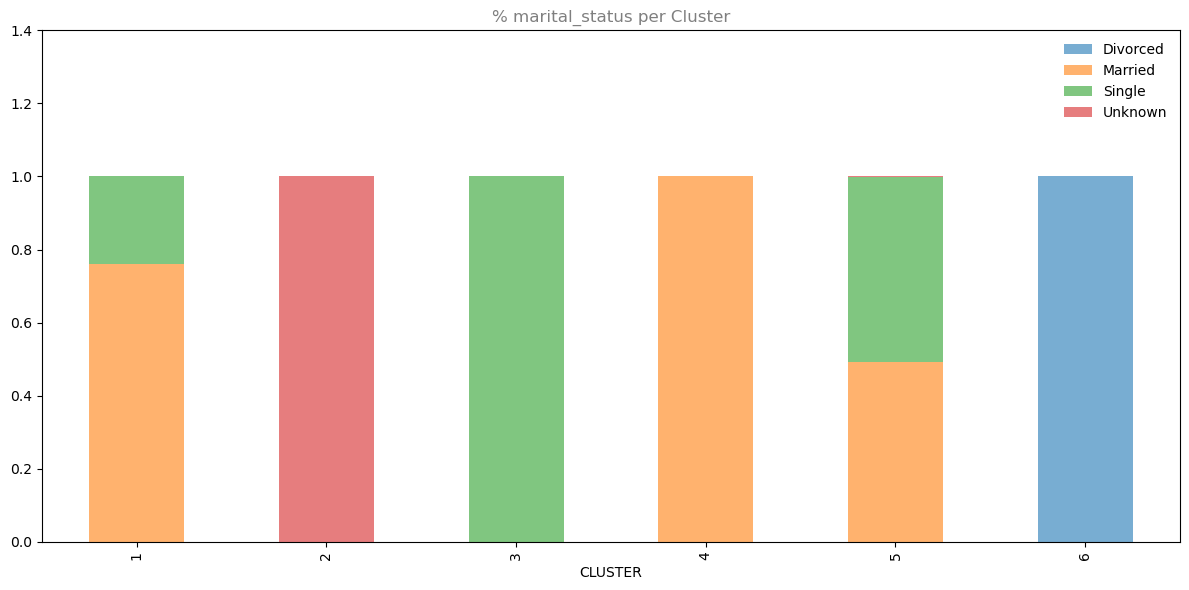

In [210]:
plot_df = pd.crosstab(
  index=df['CLUSTER'], columns=df['marital_status'],
  values=df['marital_status'], aggfunc='size', normalize='index'
)

fig, ax = plt.subplots(figsize=(12,6))
plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
ax.set_title(f'% marital_status per Cluster', alpha=0.5)

ax.set_ylim(0, 1.4)
ax.legend(frameon=False)
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()